In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 435.2 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Fraud.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

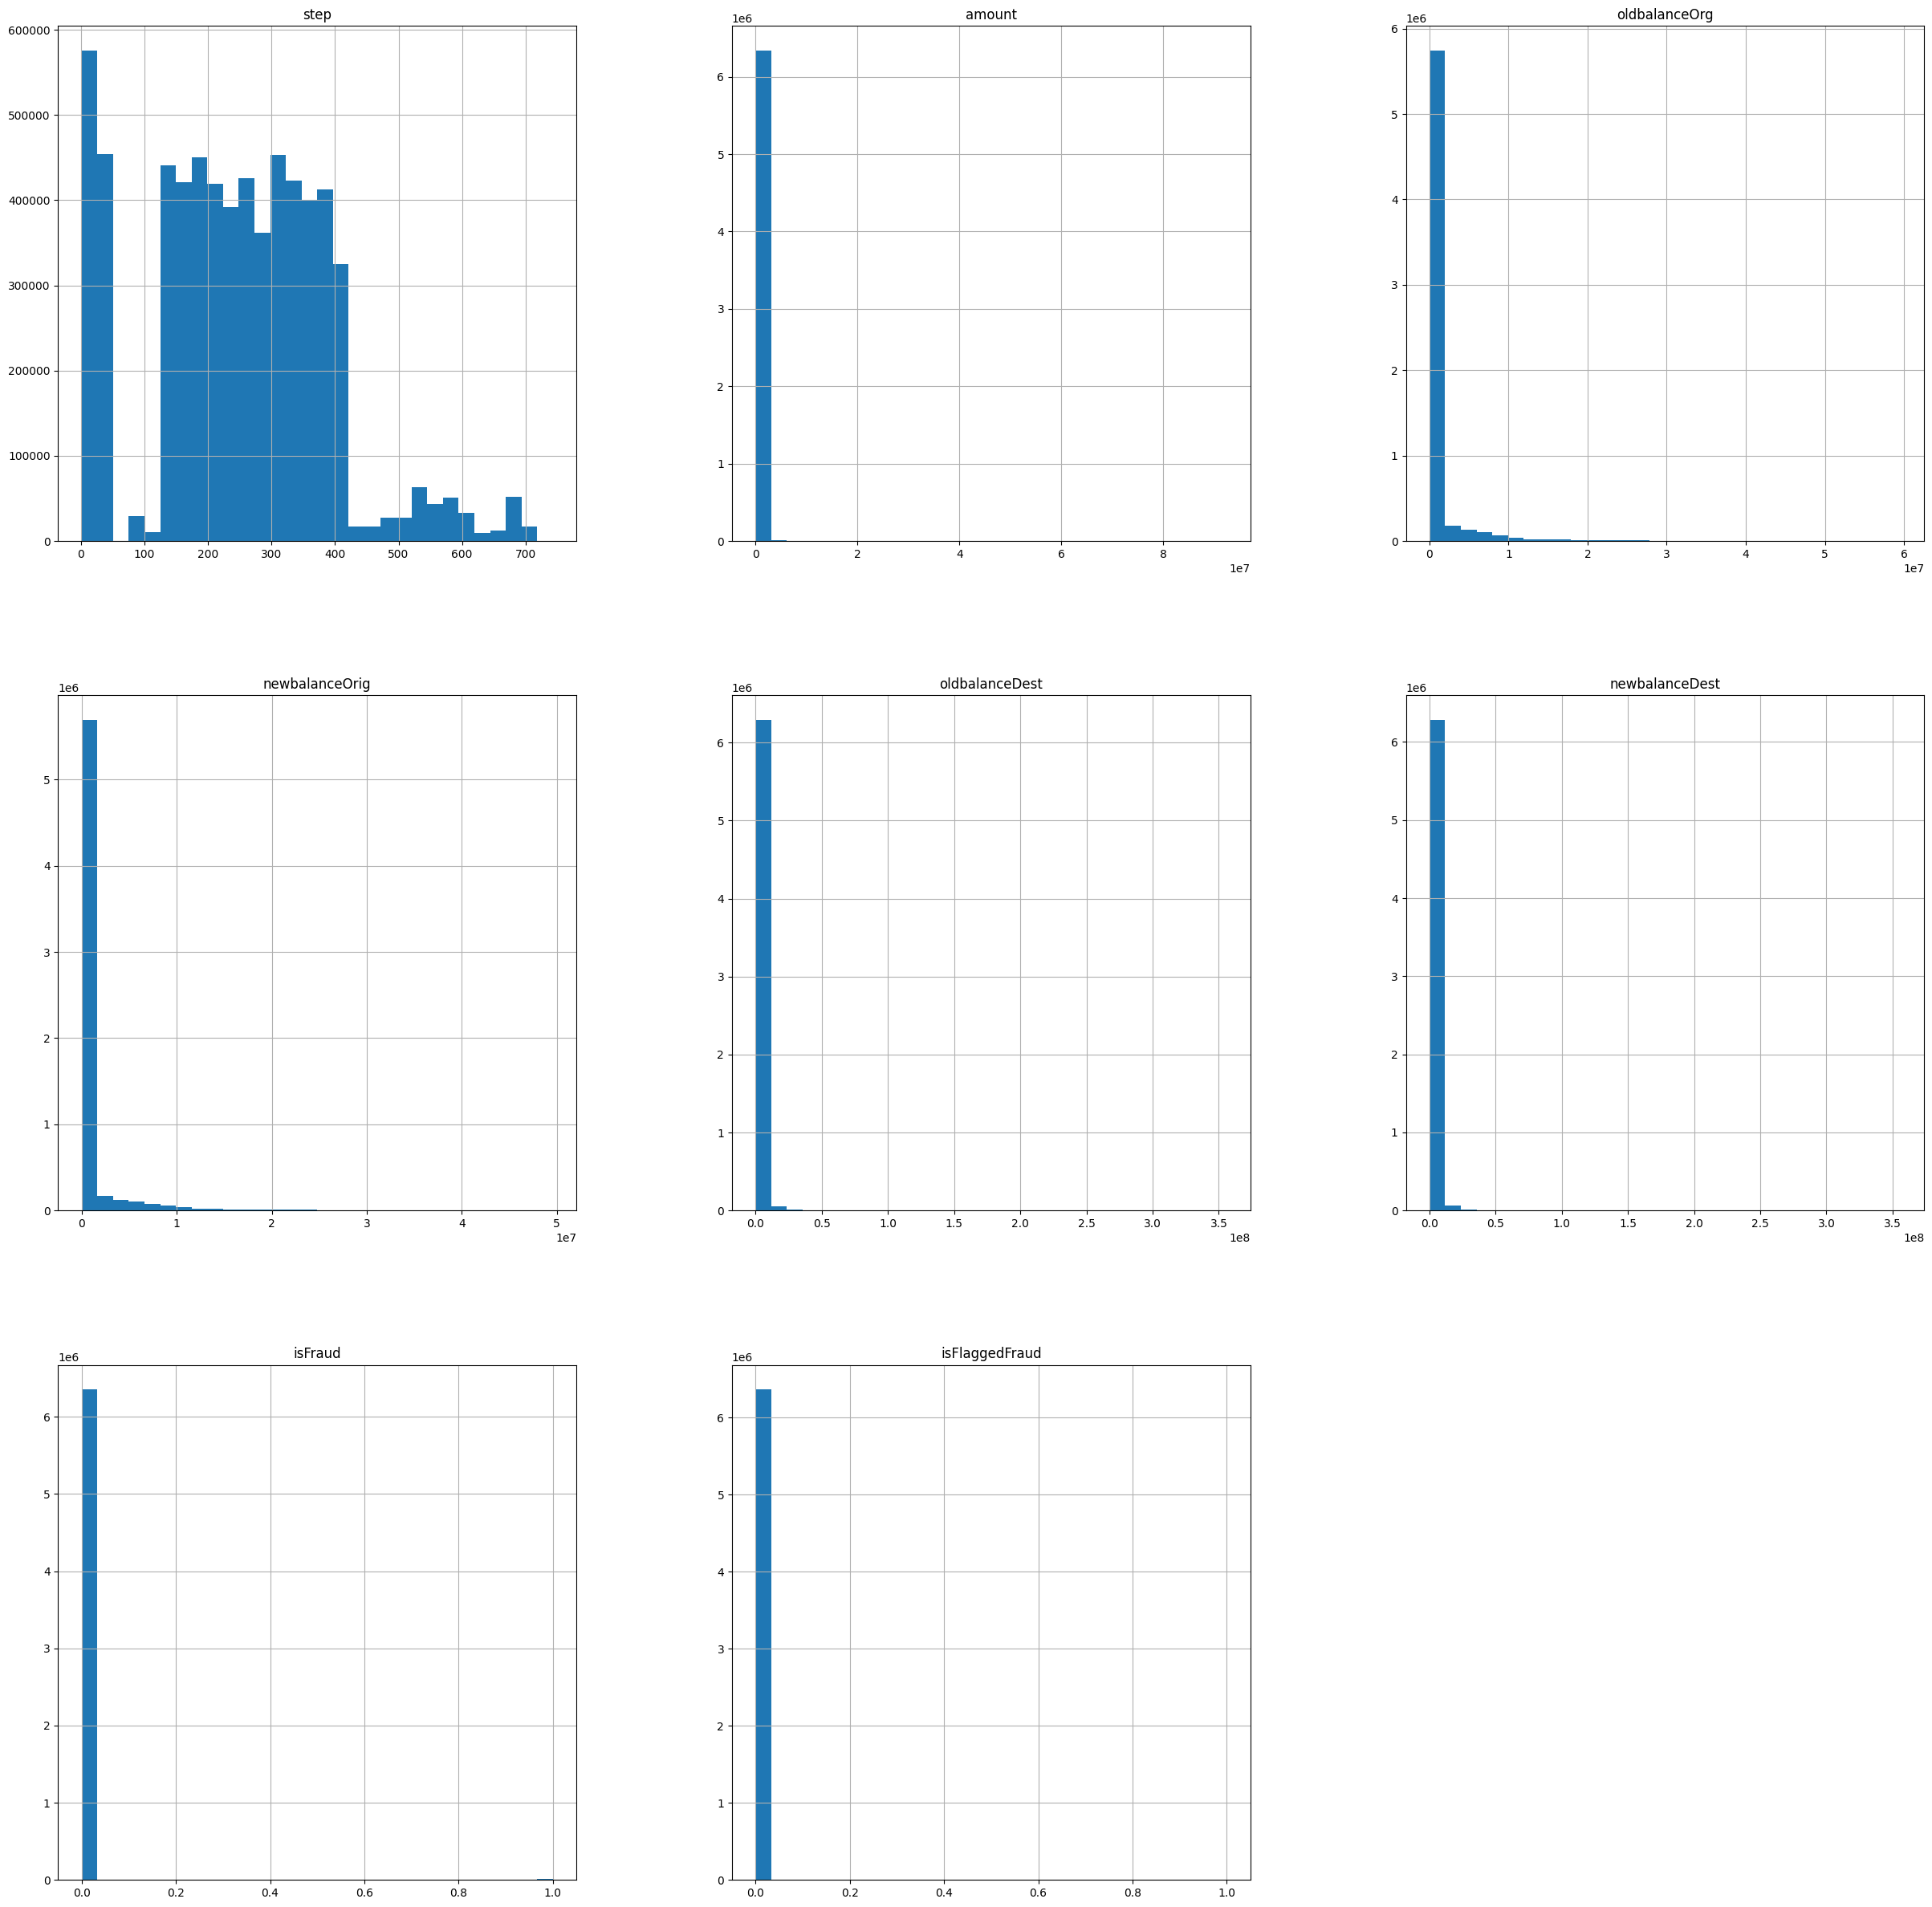

In [ ]:
df.hist(bins=30, figsize=(30,30))

Univariate analysis

<ipython-input-11-b6e2ca8a7505>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['isFraud'])


<Axes: xlabel='isFraud', ylabel='count'>

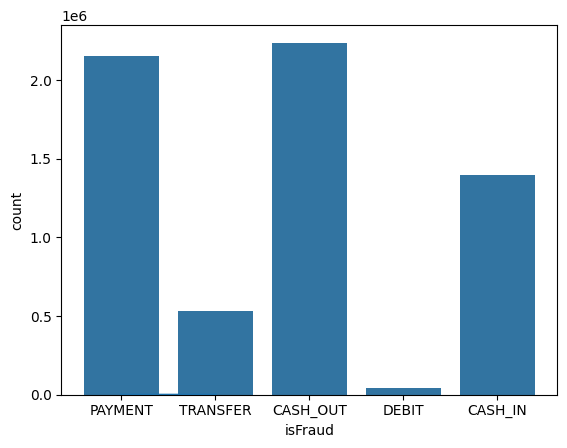

In [ ]:
sns.countplot(x='type',data=df)
sns.distplot(df['isFraud'])

<ipython-input-12-2bd665a3e9d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['isFlaggedFraud'])


<Axes: xlabel='isFlaggedFraud', ylabel='count'>

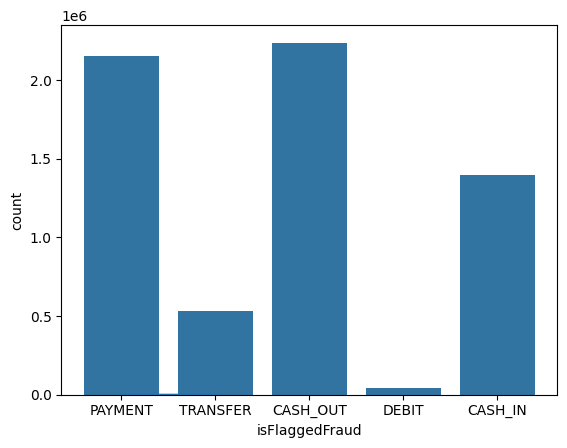

In [ ]:
sns.countplot(x='type',data=df)
sns.distplot(df['isFlaggedFraud'])

In [ ]:
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

Checking for outliers

In [ ]:
from scipy.stats import zscore


In [ ]:
for feature in numerical_features:
    df[f'{feature}_zscore'] = zscore(df[feature])

In [ ]:
import matplotlib.pyplot as plt



def plot_zscore_histogram(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[f'{feature}_zscore'], kde=True)
    plt.title(f'Z-score Distribution for {feature}')
    plt.xlabel('Z-score')
    plt.ylabel('Count')
    plt.show()

In [ ]:

def plot_zscore_boxplot(df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(df=df[f'{feature}_zscore'])
    plt.title(f'Z-score Distribution for {feature}')
    plt.xlabel('Feature')
    plt.ylabel('Z-score')
    plt.show()

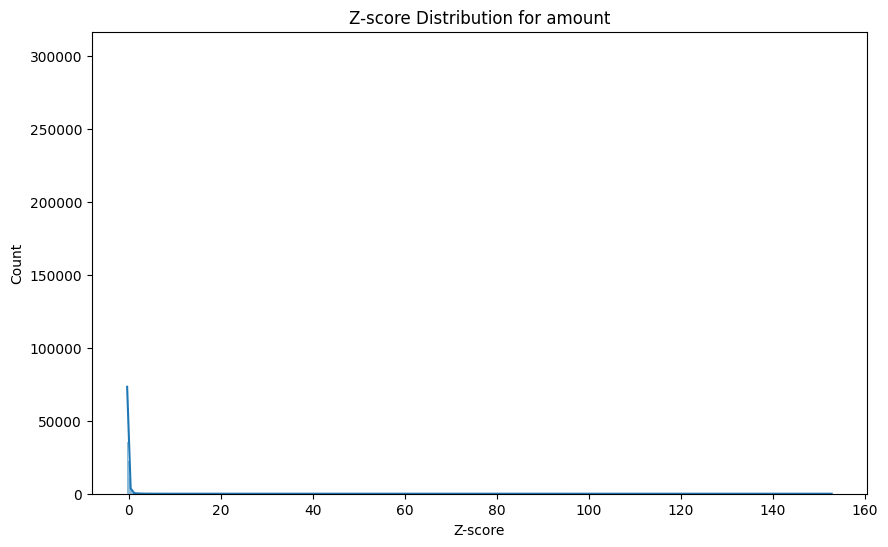

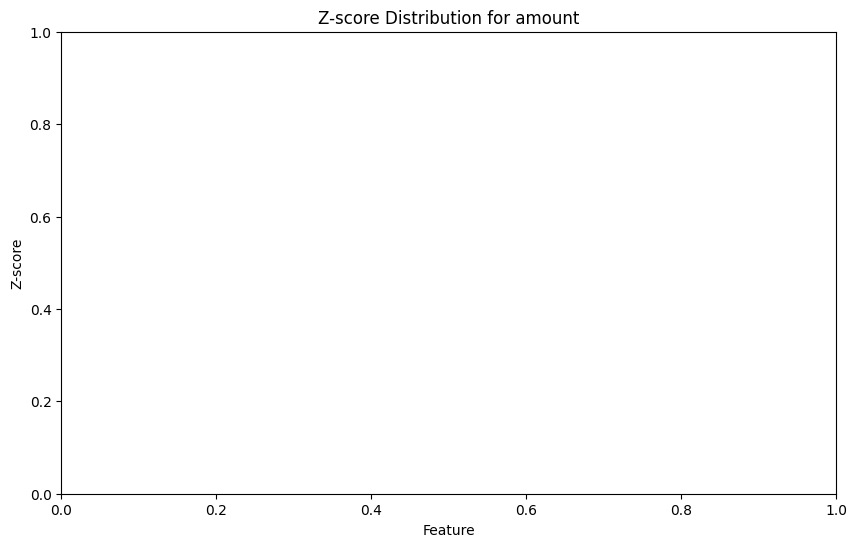

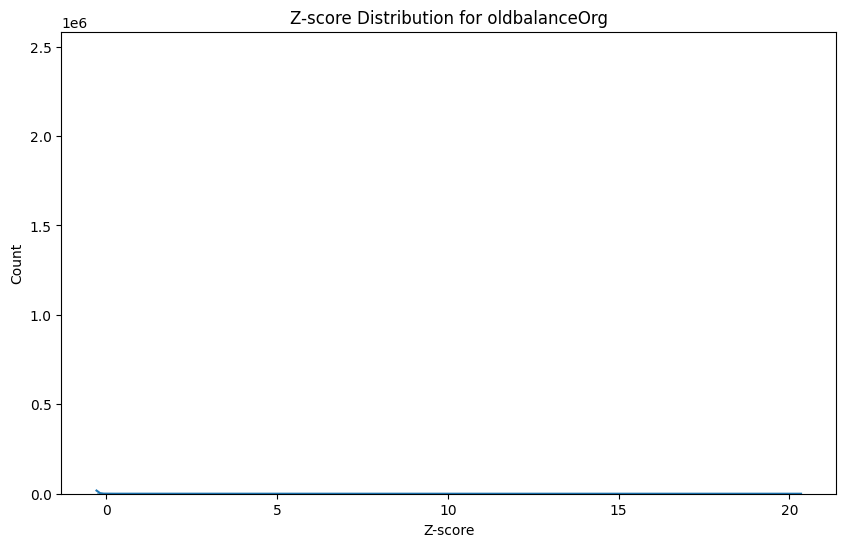

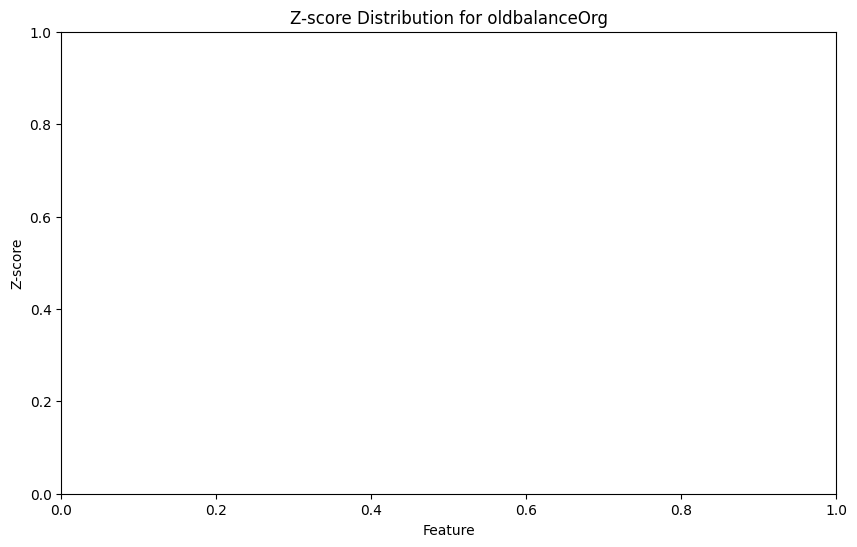

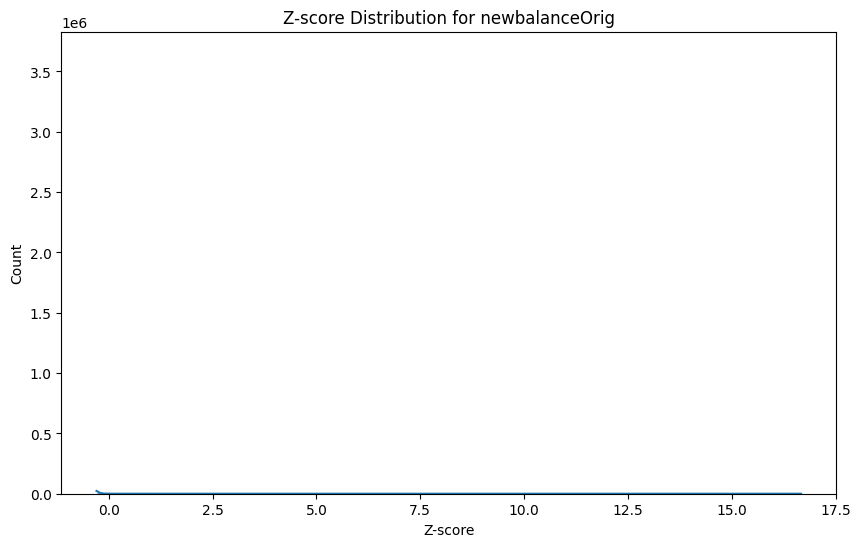

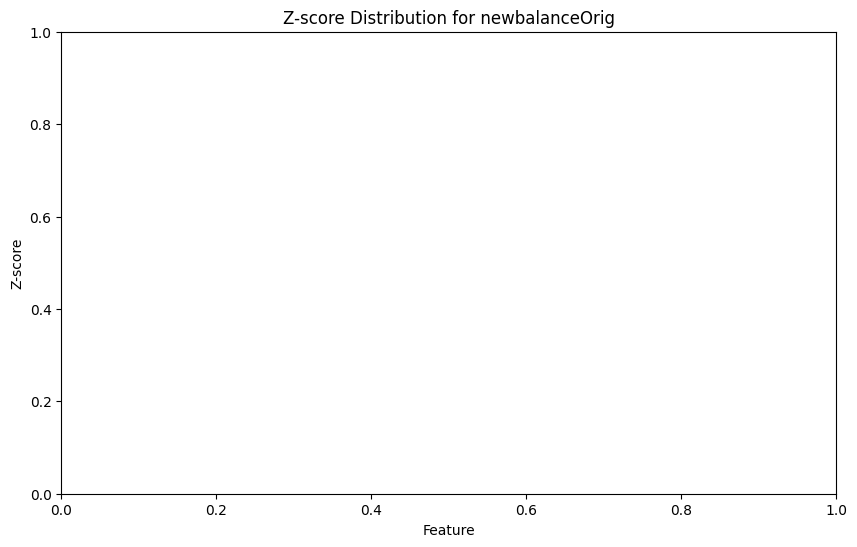

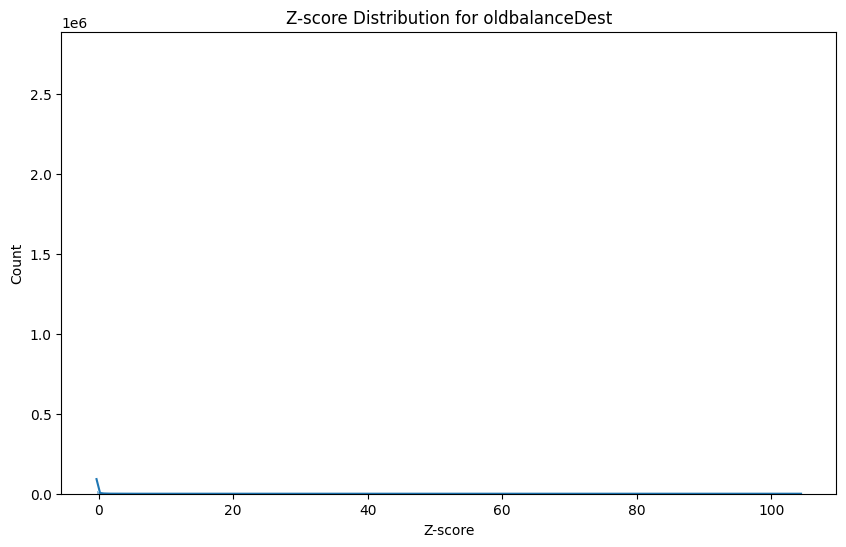

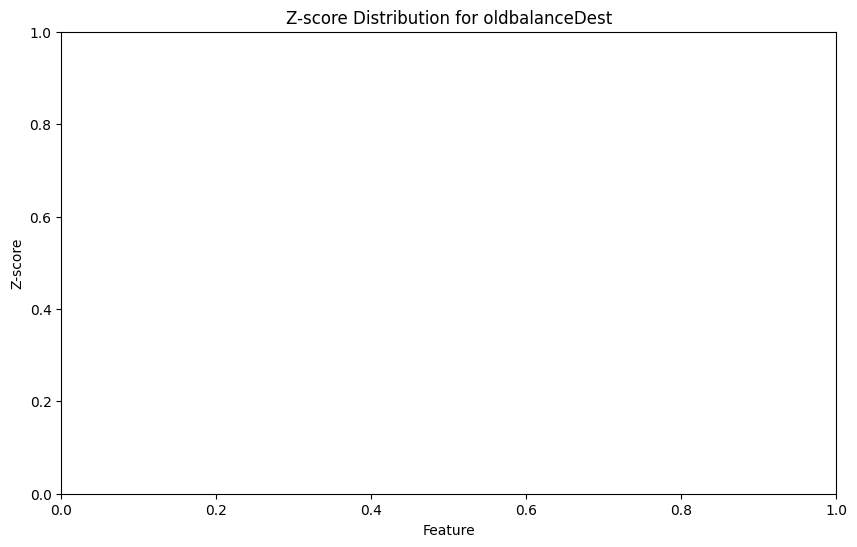

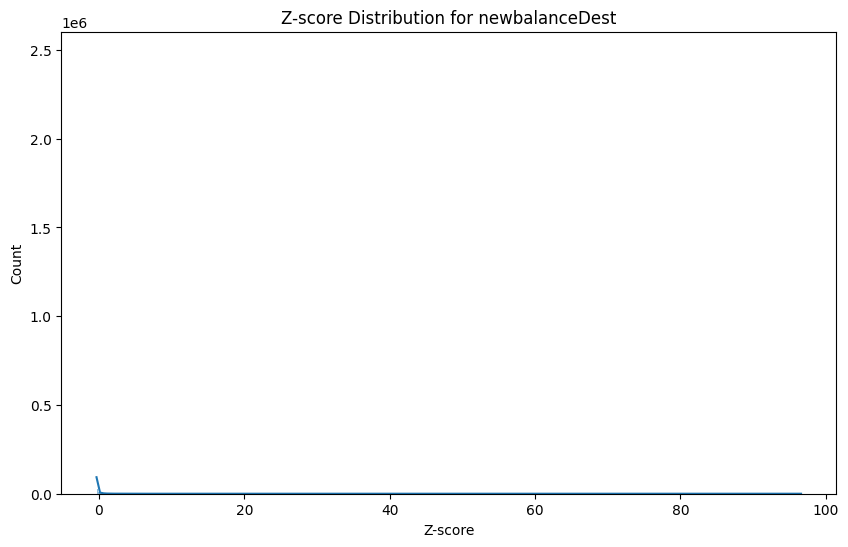

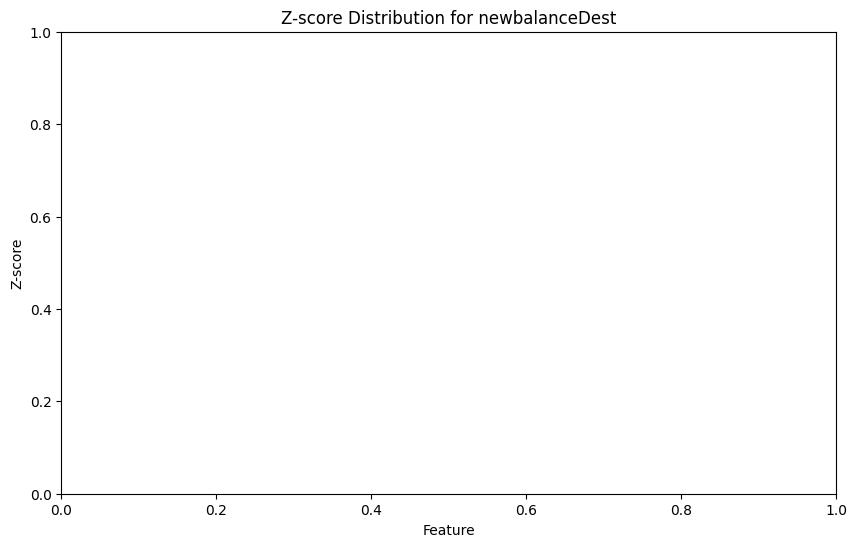

In [ ]:

for feature in numerical_features:
    plot_zscore_histogram(df, feature)
    plot_zscore_boxplot(df, feature)

In [ ]:
for feature in numerical_features:
    df[f'{feature}_outlier'] = (
        (df[f'{feature}_zscore'] > 3) | (df[f'{feature}_zscore'] < -3)
    ).astype(int)


In [ ]:
for feature in numerical_features:
    outlier_count = df[f'{feature}_outlier'].sum()
    print(f"Number of outliers for {feature}: {outlier_count}")

Number of outliers for amount: 44945
Number of outliers for oldbalanceOrg: 155140
Number of outliers for newbalanceOrig: 155931
Number of outliers for oldbalanceDest: 79846
Number of outliers for newbalanceDest: 75166


Applying One-hot-encoding for 'type' feature

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
categorical_features = ['type']
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_data = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features]))
encoded_data.columns = one_hot_encoder.get_feature_names_out(categorical_features)
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MinMax scaling for dealing with outliers in the dataset

In [ ]:
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
X = df.drop(['isFraud', 'isFlaggedFraud','nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
print('Logistic Regression:')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logreg))
print('Precision:', precision_score(y_test, y_pred_logreg))
print('Recall:', recall_score(y_test, y_pred_logreg))
print('F1-score:', f1_score(y_test, y_pred_logreg))
print('ROC AUC:', roc_auc_score(y_test, y_pred_logreg))

Logistic Regression:
Confusion Matrix:
[[1270841      63]
 [    929     691]]
Precision: 0.916445623342175
Recall: 0.4265432098765432
F1-score: 0.582139848357203
ROC AUC: 0.7132468194312623


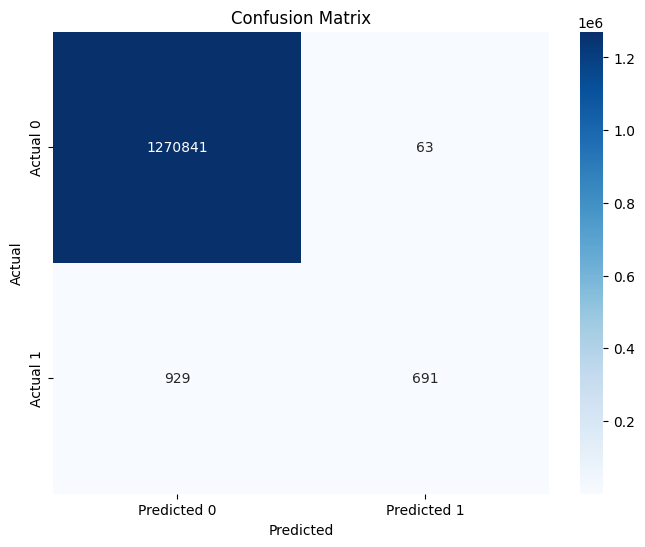

<ipython-input-32-c362e03e6f20>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


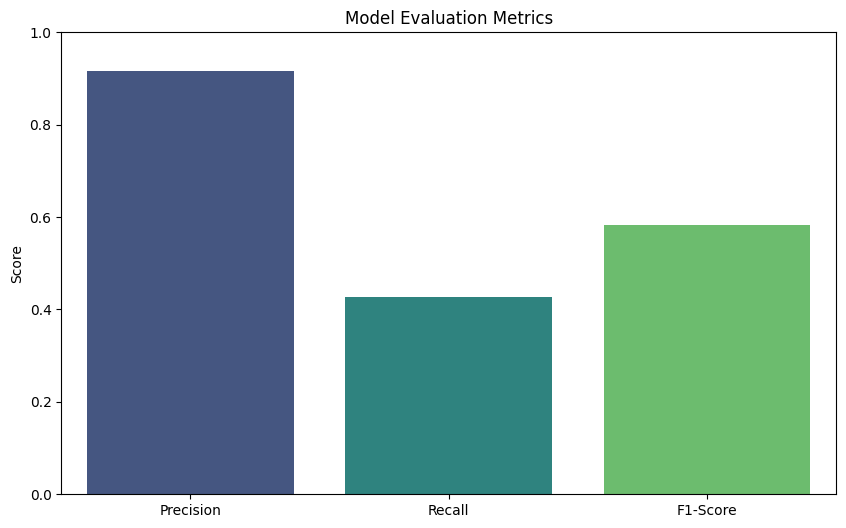

<ipython-input-32-c362e03e6f20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['ROC AUC'], y=[roc_auc], palette='viridis')


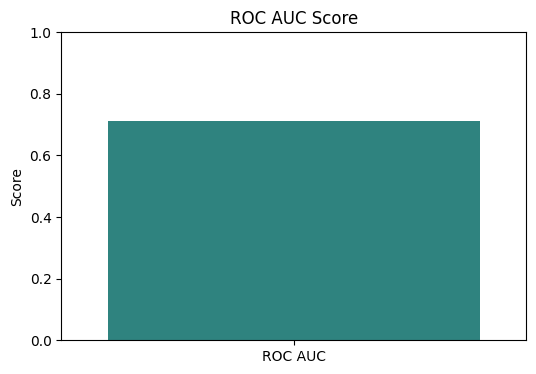

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)
precision =  precision_score(y_test, y_pred_logreg)
recall= recall_score(y_test, y_pred_logreg)
f1_score = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(x=['ROC AUC'], y=[roc_auc], palette='viridis')
plt.ylim(0, 1)
plt.title('ROC AUC Score')
plt.ylabel('Score')
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1-score:', f1_score(y_test, y_pred_dt))
print('ROC AUC:', roc_auc_score(y_test, y_pred_dt))

Confusion Matrix:
[[1270746     158]
 [    201    1419]]
Precision: 0.8998097653772986
Recall: 0.8759259259259259
F1-score: 0.8877072255239287
ROC AUC: 0.9379008024850669


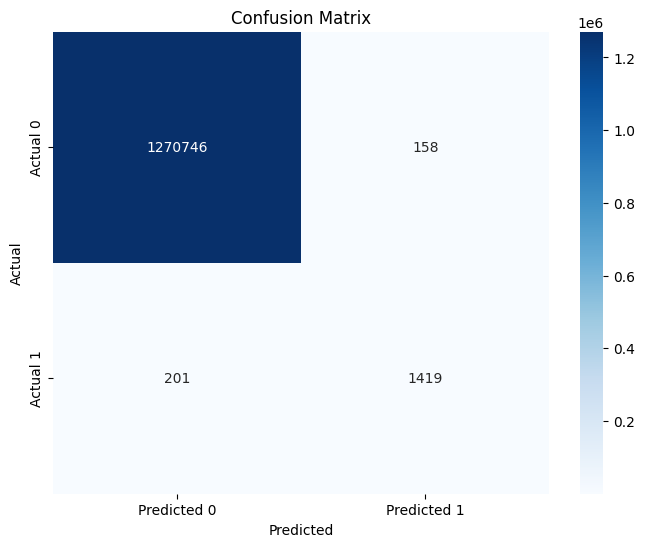

<ipython-input-37-a23a1ed6eef5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


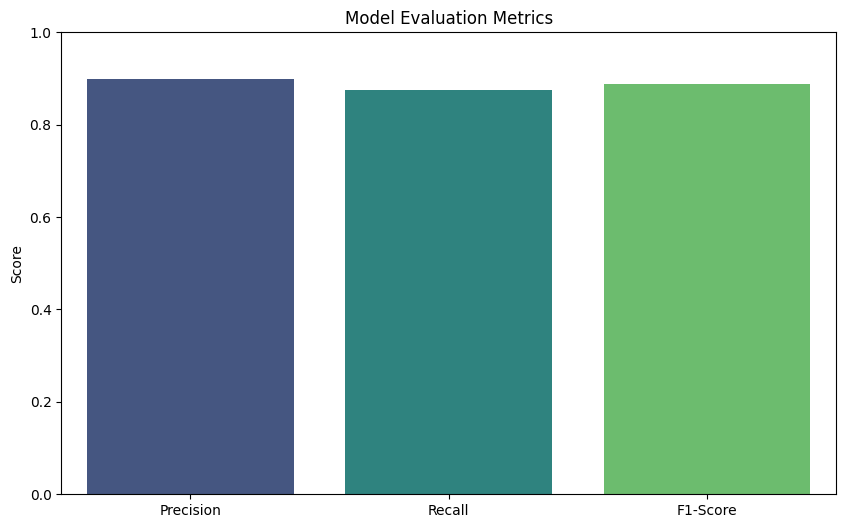

<ipython-input-37-a23a1ed6eef5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['ROC AUC'], y=[roc_auc], palette='viridis')


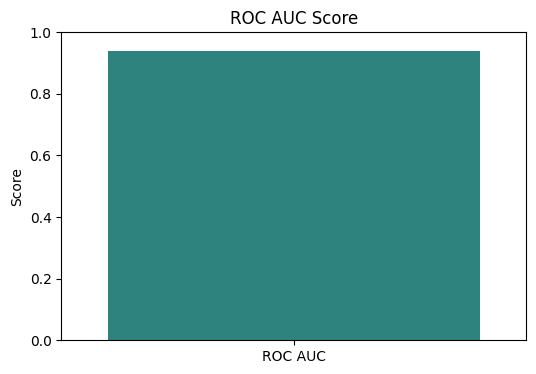

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
precision =  precision_score(y_test, y_pred_dt)
recall= recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


plt.figure(figsize=(6, 4))
sns.barplot(x=['ROC AUC'], y=[roc_auc], palette='viridis')
plt.ylim(0, 1)
plt.title('ROC AUC Score')
plt.ylabel('Score')
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print('RandomForestClassifier')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1-score:', f1_score(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_pred_rf))